# The blood transfusion dataset

In this notebook, we will present the "blood transfusion" dataset. This
dataset is locally available in the directory `datasets` and it is stored as
a comma separeted value (CSV) file. We start by loading the entire dataset.

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")

We can have a first look at the at the dataset loaded.

In [2]:
blood_transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In this dataframe, we can see that the last column correspond to the target
to be predicted called `"Class"`. We will create two variables, `data` and
`target` to separate the data from which we could learn a predictive model
and the `target` that should be predicted.

In [3]:
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

Let's have a first look at the `data` variable.

In [4]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


We observe four columns. Each record corresponds to a person that intended
to give blood. The information stored in each column are:

* `Recency`: the time in months since the last time a person intended to
  give blood;
* `Frequency`: the number of time a person intended to give blood in the
   past;
* `Monetary`: the amount of blood given in the past (in c.c.);
* `Time`: the time in months since the first time a person intended to give
  blood.

Now, let's have a look regarding the type of data that we are dealing in
these columns and if any missing values are present in our dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


Our dataset is made of 748 samples. All features are represented with integer
numbers and there is no missing values. We can have a look at each feature
distributions.

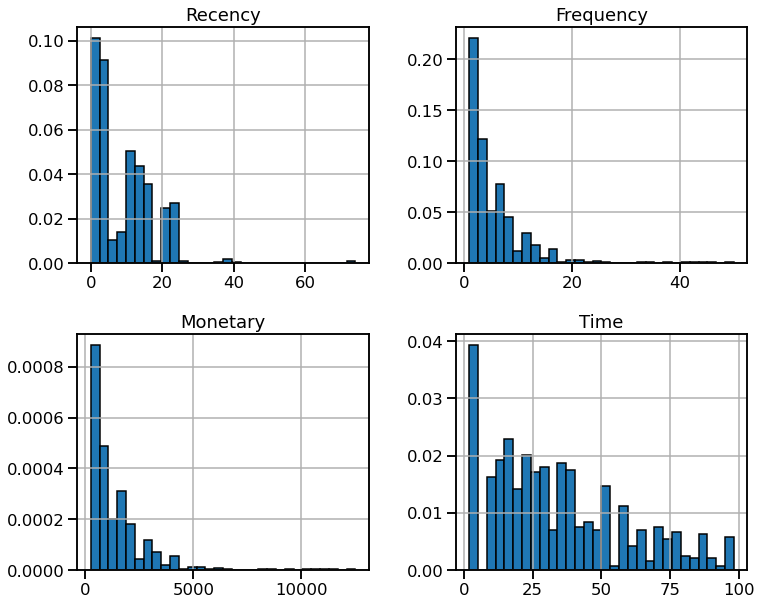

In [6]:
_ = data.hist(figsize=(12, 10), bins=30, edgecolor="black", density=True)

There is nothing shocking regarding the distributions. We only observe a high
value range for the features `"Recency"`, `"Frequency"`, and `"Monetary"`. It
means that we have a few extreme high values for these features.

Now, let's have a look at the target that we would like to predict for this
task.

In [7]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

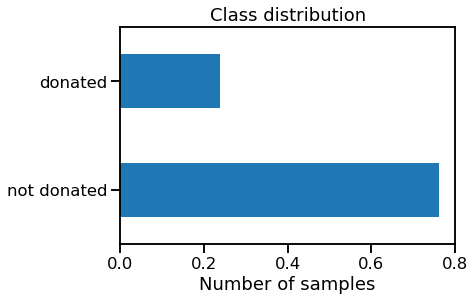

In [8]:
import matplotlib.pyplot as plt

target.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Class distribution")

We see that the target is discrete and contains two categories: whether a
person `"donated"` or `"not donated"` his/her blood. Thus the task to be
solved is a classification problem. We should note that the class counts of
these two classes is different.

In [9]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

Indeed, ~76% of the samples belong to the class `"not donated"`. It is rather
important: a classifier that would predict always this `"not donated"` class
would achieve an accuracy of 76% of good classification without using any
information from the data itself. This issue is known as class imbalance. One
should take care about the statistical performance metric used to evaluate a
model as well as the predictive model chosen itself.

Now, let's have a naive analysis to see if there is a link between features
and the target using a pair plot representation.

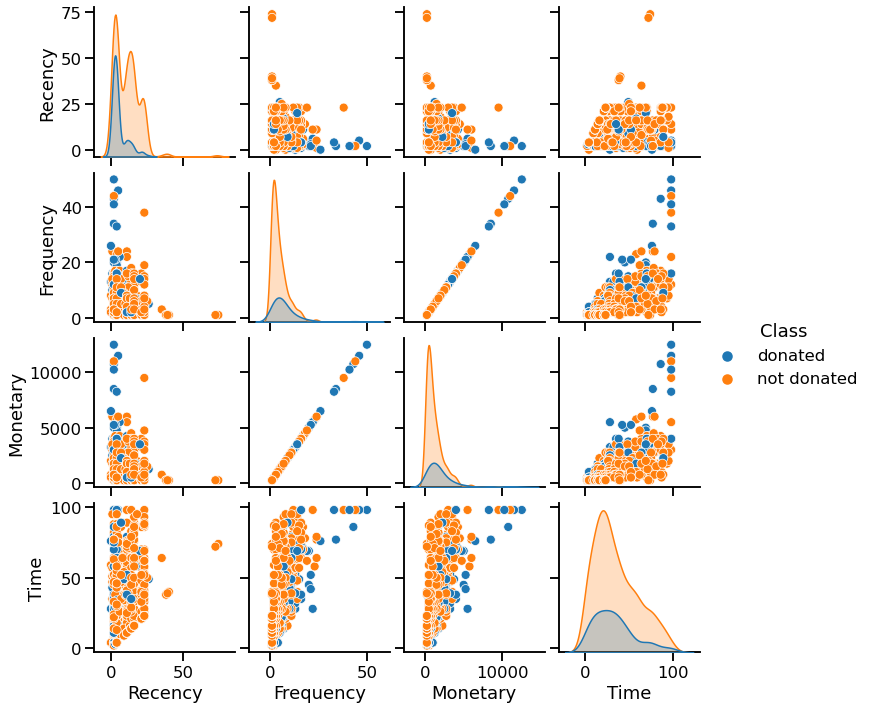

In [10]:
import seaborn as sns

_ = sns.pairplot(blood_transfusion, hue="Class")

Looking at the diagonal plots, we don't see any feature that individually
could help at separating the two classes. When looking at a pair of feature,
we don't see any stricking combinations as well. However, we can note that
the `"Monetary"` and `"Frequency"` features are perfectly correlated: all the
data points are aligned on a diagonal.

As a conclusion, this dataset would be a challenging dataset: it suffer from
class imbalance, correlated features and thus very few features will be
available to learn a model, and none of the feature combinations were found
to help at predicting.